In [1]:
#imports
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import callbacks
from keras import optimizers

Using TensorFlow backend.


In [3]:
train_data_path = './data/train'
validation_data_path = './data/validation'

"""
Parameters
"""
img_width, img_height = 150, 150
batch_size = 64
samples_per_epoch = 5400
validation_steps = 2100
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 8
lr = 0.0004
epochs = 50

In [4]:
model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filters2, (conv2_size, conv2_size), padding ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(1024)) # increased dense model from 256 to 512
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 9311 images belonging to 8 classes.
Found 9311 images belonging to 8 classes.


In [5]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        8256      
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
__________

In [6]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=samples_per_epoch // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps// batch_size,
    )

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model_v7_0_final.h5')
model.save_weights('./models/weights_v7_0_final.h5')

Epoch 1/50
84/84 [==============================] - 532s 6s/step - loss: 2.7975 - acc: 0.3125 - val_loss: 1.5930 - val_acc: 0.4058
Epoch 2/50
84/84 [==============================] - 469s 6s/step - loss: 1.5904 - acc: 0.4302 - val_loss: 1.4386 - val_acc: 0.5005
Epoch 3/50
84/84 [==============================] - 456s 5s/step - loss: 1.5037 - acc: 0.4760 - val_loss: 1.3660 - val_acc: 0.5054
Epoch 4/50
84/84 [==============================] - 521s 6s/step - loss: 1.4432 - acc: 0.4918 - val_loss: 1.4269 - val_acc: 0.4731
Epoch 5/50
84/84 [==============================] - 574s 7s/step - loss: 1.4211 - acc: 0.4990 - val_loss: 1.2521 - val_acc: 0.5571
Epoch 6/50
84/84 [==============================] - 455s 5s/step - loss: 1.3639 - acc: 0.5229 - val_loss: 1.2370 - val_acc: 0.5776
Epoch 7/50
84/84 [==============================] - 343s 4s/step - loss: 1.3435 - acc: 0.5335 - val_loss: 1.2280 - val_acc: 0.5776
Epoch 8/50
84/84 [==============================] - 343s 4s/step - loss: 1.2918 - a

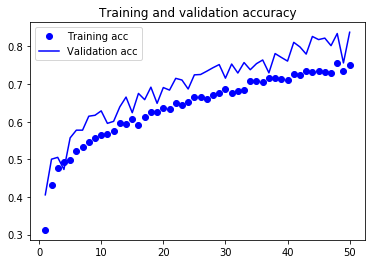

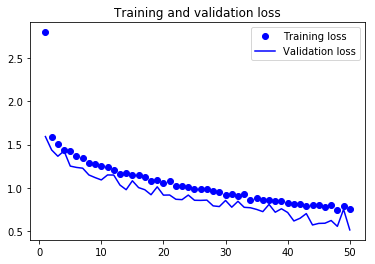

In [10]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#predict_multiclass
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model


img_width, img_height = 150, 150
model_path = './models/modelv4.0_8.categories.h5'
model_weights_path = './models/weights_v4.0_8.categories.0.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Label: banana")
  elif answer == 1:
    print("Labels: battery")
  elif answer == 2:
    print("Label: computer")
  elif answer == 3:
    print("Label: glass_bottel")
  elif answer == 4:
    print("Label: light_blub")
  elif answer == 5:
    print("Label: paper")
  elif answer == 6:
    print("Label: phone")
  elif answer == 7:
    print("Label: plastic")
  

  return answer

In [ ]:
# classify a picture
for i, ret in enumerate(os.walk('./test-data/whatishere')):
  for i, filename in enumerate(ret[2]):
    result = predict(ret[0] + '/' + filename)